In [8]:

%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand


import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc
# matplotlib.font_manager._rebuild()
rc('font',**{'family':'serif','serif':['CMU Serif Roman']}) # latex font for matplotlib
rc('text', usetex=True)
# np.seterr('raise')

# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'
import sys
sys.path.insert(0,'/home/claire/Works/exo-top/')
import pyshtools
import cartopy.crs as ccrs
import john_scripts.venus_topo_stats as vts

In [9]:
def load_spectrum(fname='', path='benchmarks/'):
    df = pd.read_csv(path+fname, header=None, names=['degree', 'value'], index_col=False, engine='python') 
    ls = np.array(df['degree'])
    S = np.array(df['value'])
    return S
       
    
def RMS_perl(spec=None, clm_topo=None, lmin=1, lmax=10, verbose=False):
    # Calculate RMS topography from power spectrum
    if spec is None:
        spec = clm_topo.spectrum(unit='per_l', lmax=lmax)
#     print(spec)
    l = np.arange(lmin, lmax+1)
    RMS_topo = np.sqrt(np.sum(spec[:lmax]/(2*l + 1)))
    if verbose:
        print("RMS_topo", RMS_topo, "m")

    return RMS_topo

def RMS_perlm(spec=None, clm_topo=None, lmin=1, lmax=10, verbose=False):
    if spec is None:
        spec = clm_topo.spectrum(unit='per_lm', lmax=lmax)
    l = np.arange(lmin, lmax+1)
    # assume this starts at 1
    print('l=', l)
        
    spec_perl = np.zeros(lmax)
    for  ii, s in enumerate(spec[:lmax]):
        spec_perl[ii] = s*(2*l[ii]+1)
    return RMS_perl(spec=spec_perl, lmin=lmin, lmax=lmax, verbose=verbose)
        
def RMS_amplitude(spec=None, lmin=1, lmax=10, verbose=False):
    spec = spec*1000 #spec**2
    return RMS_perl(spec=spec, lmin=lmin, lmax=lmax, verbose=verbose)
    
    

In [11]:
cilm_topo, lmax_out = pyshtools.shio.shread('benchmarks/sph_Venus/VenusTopo719.shape')
clm_topo = pyshtools.SHCoeffs.from_array(cilm_topo)

clm_topo.coeffs[:,0] = 0.0 # Get rid of degree 0 corresponding to mean radius
vts.RMS_from_l_powerspectrum(clm_topo=clm_topo, lmax=20)

RMS_topo 865.4906656355711 m


865.4906656355711

In [20]:
# calculate RMS from model spectra

print('Huang 8', RMS_amplitude(spec=load_spectrum(fname='8_m.csv', path='benchmarks/huang_Venus/'),
              lmin=1, lmax=10, verbose=False), 'm')

print('Yang', RMS_amplitude(spec=load_spectrum(fname='h_amplitude_m.csv', path='benchmarks/yang_Venus/'),
              lmin=1, lmax=10, verbose=False), 'm')

print('Wei', RMS_perl(spec=load_spectrum(fname='model_power_m2.csv', path='benchmarks/wei_Venus/'),
              lmin=1, lmax=10, verbose=False), 'm')

print('---\n')
print(RMS_amplitude(spec=load_spectrum(fname='1_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='2_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='3_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='4_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='5_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='6_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='7_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='8_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='9_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='10_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='11_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='12_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='13_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
      RMS_amplitude(spec=load_spectrum(fname='15_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False),',',
     )

Huang 8 489.32474100304574 m
Yang 475.66115968277234 m
Wei 213.05241962826716 m
---

200.15279436132423 , 688.2014927583677 , 673.7880493468331 , 402.07565967751117 , 695.2136989391211 , 672.4561163950626 , 214.12066607342535 , 488.4601789919337 , 878.5607285545191 , 292.43829959982384 , 311.3352436867767 , 339.3664129742059 , 640.1361418805931 , 430.1894190342128 ,


In [14]:
# check you get the right RMS as JFR's demo above

print('Huang', RMS_amplitude(spec=load_spectrum(fname='observed_m.csv', path='benchmarks/huang_Venus_complete/'),
              lmin=1, lmax=10, verbose=False), 'm')

print('Yang', RMS_amplitude(spec=load_spectrum(fname='h_m_observed.csv', path='benchmarks/yang_Venus/'),
              lmin=1, lmax=10, verbose=False), 'm')

print('Wei', RMS_perl(spec=load_spectrum(fname='observed_power_m2_l10.csv', path='benchmarks/wei_Venus/'),
              lmin=1, lmax=10, verbose=False), 'm')




Huang 776.6478118949665 m
Yang 776.2186294431615 m
Wei 776.0523783181842 m


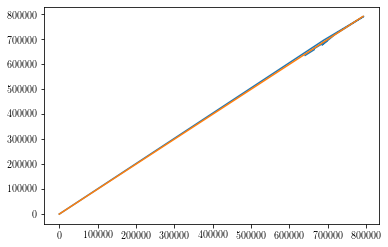

In [52]:
# how to get power from amplitude

# difference between Yang and Wei
Yang_m = load_spectrum(fname='h_m_observed.csv', path='benchmarks/yang_Venus/')
Wei_m2 = load_spectrum(fname='observed_power_m2_l10.csv', path='benchmarks/wei_Venus/')

plt.plot(Yang_m*1000, Wei_m2)
plt.plot(np.linspace(0,np.max(Wei_m2)),np.linspace(0,np.max(Wei_m2)))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
/home/claire/anaconda3/lib/python3.7/site-packages/pyshtools/shclasses/shcoeffsgrid.py:1827: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/claire/anaconda3/lib/python3.7/site-packages/pyshtools/shclasses/shcoeffsgrid.py:1827: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RMS_topo 787.7186538397798 m


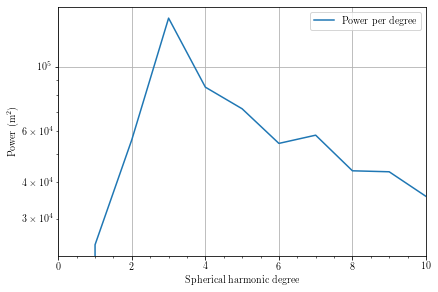

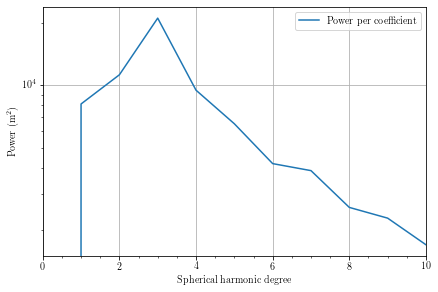

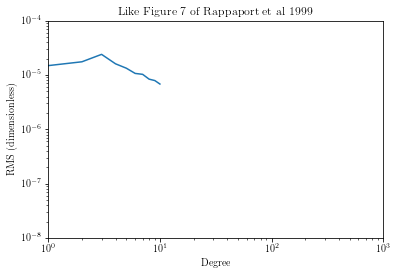

In [55]:
vts.plot_Venus(lmax=10)

In [28]:
lmax_data = 5##30  # spherical harmonic degree 
lmax_plot = 5##120  # spherical harmonic degree to use for plotting purposes
filename = 'benchmarks/sph_Venus/venus_sphcoeffs.csv'#'../hoggard/NGS-2015-07-01303-s13.csv'#
sh = np.loadtxt(filename, delimiter=",", skiprows=1)
cilm = np.zeros((2, lmax_data+1, lmax_data+1))

# print(sh)
# print(np.shape(sh))



for i in range(sh.shape[0]):
    l = int(sh[i,0])
    m = int(sh[i,1])
    C_lm = sh[i,2]
    S_lm = sh[i,3]
    cilm[0, l, m] = C_lm*1e3  # 1e3 to convert from km to m
    cilm[1, l, m] = S_lm*1e3  # 1e3 to convert from km to m


# cs phase included??
clm= pyshtools.SHCoeffs.from_array(cilm,lmax=lmax_data,normalization="ortho",csphase=-1)

/home/claire/anaconda3/lib/python3.7/site-packages/pyshtools/shclasses/shcoeffsgrid.py:1827: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.0001228159253014527


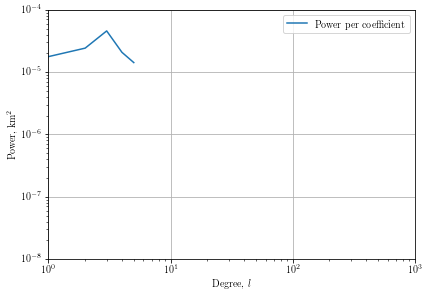

In [33]:
fig1, ax1 = clm.plot_spectrum(unit="per_lm",xscale='log',yscale='log') 
# The average power per coefficient as a function of spherical harmonic degree can be calculated by 
# setting the parameter unit equal to 'per_lm'. This is simply the power per degree divided by (2l+1)

plt.ylabel("Power, km$^2$")
plt.xlabel("Degree, $l$")
plt.xlim(1,1e3)
plt.ylim(1e-8, 1e-4)

S_lm = clm.spectrum(unit="per_lm")
print(np.sum(S_lm))

In [43]:
# calculate RMS

def powerspectrum_RMS(path=None, power_lm=None, amplitude=False, n=None): # try to calcuate RMS from digitized power spectrum
    if path is not None:
        df = pd.read_csv(path, header=None, names=['degree', 'value'], index_col=False) 
        ls = np.array(df['degree'])
        S = np.array(df['value'])
    elif power_lm is not None:
        ls = np.arange(1, len(power_lm)-1)
        S = power_lm

    if n is None:
        n = len(ls)

    RMS_l = []
    for ii, l in enumerate(ls[0:n]):
        Slm = S[ii]
        if amplitude:
            Slm = Slm**2
        RMS_l.append(np.sqrt(Slm/(2*l + 1)))
    return sum(RMS_l)

print('Rappaport', powerspectrum_RMS(power_lm=S_lm), 'km')
print('Wei', powerspectrum_RMS(path='benchmarks/wei_Venus/observed_power_m2_l10.csv', n=6), 'm')
print('Huang', powerspectrum_RMS(path='benchmarks/huang_Venus/observed_m.csv', n=6, amplitude=True), 'm')
print('Yang', powerspectrum_RMS(path='benchmarks/yang_Venus/h_m_observed.csv', n=6, amplitude=True), 'm')
print('Benesova', powerspectrum_RMS(path='benchmarks/benesova_Venus/observed_m2.csv', n=6), 'm')

Rappaport 0.006000833753150744 km
Wei 1689.0378920042974 m
Huang 1448.1500856489208 m
Yang 1439.8945695528873 m
Benesova 5048.635697723783 m


In [59]:
def load_grid(fname='', path='benchmarks/lees_topo_grids/'):
    x,y,h = np.loadtxt(path+fname, delimiter=None, skiprows=0, usecols=None, unpack=True)
    #df = pd.read_csv(path+fname, header=None, names=['x', 'y', 'h'], index_col=False, engine='python') 
    return x,y,h

def grid_RMS(x,y,h):
    return np.sqrt(np.mean(h**2))

def grid_peak(x,y,h):
    return np.max(h)

In [60]:
x,y,h=load_grid(fname='Ra1e5_topography.txt')
print(grid_peak(x,y,h))
x,y,h=load_grid(fname='Ra3e5_topography.txt')
print(grid_peak(x,y,h))
x,y,h=load_grid(fname='Ra1e6_topography.txt')
print(grid_peak(x,y,h))
#plt.contourf(x,y,h)

0.125746699674
0.105032009653
0.08411800809
